#  Churn Prediction

Churn prediction is common use case in machine learning domain. Churn means "leaving the company". It is very critical for business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company. 

In this project, I will use "Telco Customer Churn" data set which is available on Kaggle.

Now lets go through the following steps and build our model with best accuracy.:)

# Import the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the DATA

#### Read the csv file

In [2]:
customer_df=pd.read_csv("Telco-Customer-Churn.csv")

#### Check the head(), tail(), info() and describe() of the data

In [3]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
customer_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000




### changing dataype as some  numerical features have 'object' as datatype

In [7]:

customer_df["TotalCharges"]=pd.to_numeric(customer_df["TotalCharges"], errors='coerce')

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
customer_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

### Missing Data

#### We will use seaborn to create a simple heatmap to see where we are missing data!

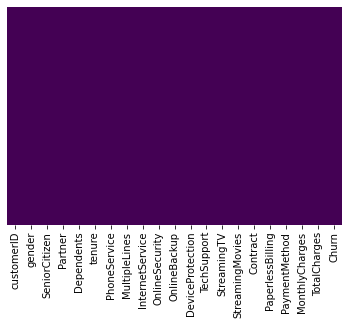

In [10]:
sns.heatmap(customer_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Therefore we can conclude that there are no missing data in our dataset.

### Now checking the value count of our dependent variable i.e. target variable.

#### checking Target variable has imbalanced class distribution or not


No     5174
Yes    1869
Name: Churn, dtype: int64


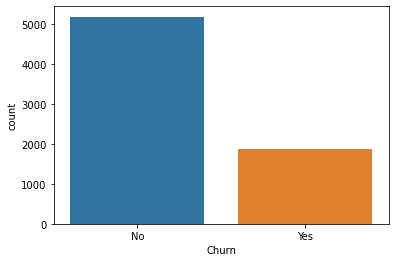

In [11]:
print(customer_df['Churn'].value_counts())
sns.countplot(x='Churn',data=customer_df)

#### value count of target variable grouped by gender

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64


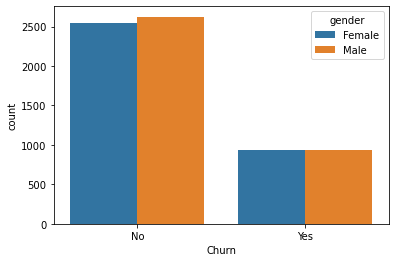

In [12]:
print(customer_df['Churn'].groupby(customer_df['gender']).value_counts())
sns.countplot(data=customer_df,x='Churn',hue='gender')

# Exploring Features

#### change the values of target variable. "Yes" will be 1 and "No" will be 0.


In [13]:
def change(col):
    if col=="Yes":
        return 1
    if col=="No":
        return 0

In [14]:
customer_df['Churn']=customer_df['Churn'].apply(change)

In [15]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Binary and categorical features


In [16]:
for col in customer_df:
    print(col+"  "+str(customer_df[col].value_counts().count()))




customerID  7043
gender  2
SeniorCitizen  2
Partner  2
Dependents  2
tenure  73
PhoneService  2
MultipleLines  3
InternetService  3
OnlineSecurity  3
OnlineBackup  3
DeviceProtection  3
TechSupport  3
StreamingTV  3
StreamingMovies  3
Contract  3
PaperlessBilling  2
PaymentMethod  4
MonthlyCharges  1585
TotalCharges  6530
Churn  2


### Binary features

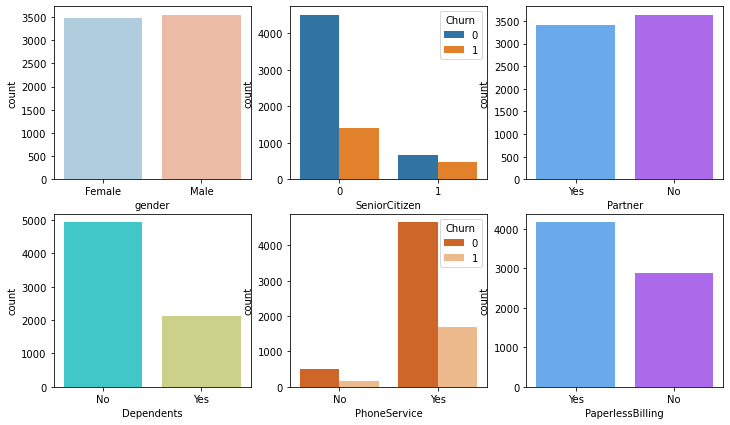

In [17]:
fig,axes=plt.subplots(2,3,figsize=(12,7))

sns.countplot(data=customer_df,x=customer_df['gender'],palette='RdBu_r',ax=axes[0,0])
sns.countplot(data=customer_df,x=customer_df['SeniorCitizen'],hue='Churn',ax=axes[0,1])
sns.countplot(data=customer_df,x=customer_df['Partner'],palette='cool',ax=axes[0,2])
sns.countplot(data=customer_df,x=customer_df['Dependents'],palette='rainbow',ax=axes[1,0])
sns.countplot(data=customer_df,x=customer_df['PhoneService'],hue='Churn',palette='Oranges_r',ax=axes[1,1])
sns.countplot(data=customer_df,x=customer_df['PaperlessBilling'],palette='cool',ax=axes[1,2])


 as there is large imbalance in SeniorCitizen ans PhoneService features so the may be selected for churn prediction but now lets see the mean between each binary feature with our target variable

In [18]:
customer_df['Churn'].mean()

0.2653698707936959

In [19]:
customer_df[['gender','Churn']].groupby("gender").mean()

,Churn
gender,
Female,0.269209
Male,0.261603


As we can see both male and female have approx equal chance to churn so the gender feature would not help much in prediction.

In [20]:
customer_df[['SeniorCitizen','Churn']].groupby("SeniorCitizen").mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


Non seniorCitizen has less chance to churn then seniorCitizen so this feature can help in our prediction model.

In [21]:
customer_df[['Partner','Churn']].groupby("Partner").mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [22]:
customer_df[['Dependents','Churn']].groupby("Dependents").mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [23]:
customer_df[['PhoneService','Churn']].groupby("PhoneService").mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


We can ignore this feature as people with and without phoneService has equal chance to churn.

In [24]:
customer_df[['PaperlessBilling','Churn']].groupby("PaperlessBilling").mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


So from the above observation the features which I chose not to add to my prediction model are: 1) gender  2) PhoneService

Now lets have a look at our categorical and continuous features :)

### Categorical Features

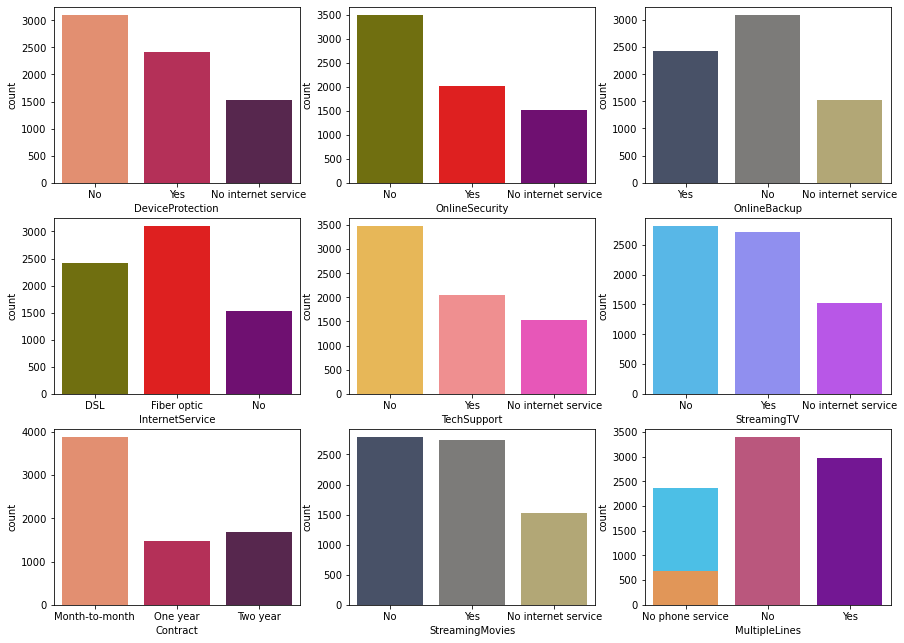

In [25]:
fig,axes=plt.subplots(3,3,figsize=(15,11))

sns.countplot(data=customer_df,x=customer_df['DeviceProtection'],palette='rocket_r',ax=axes[0,0])
sns.countplot(data=customer_df,x=customer_df['OnlineSecurity'],palette='brg_r',ax=axes[0,1])
sns.countplot(data=customer_df,x=customer_df['OnlineBackup'],palette='cividis',ax=axes[0,2])
sns.countplot(data=customer_df,x=customer_df['InternetService'],palette='brg_r',ax=axes[1,0])
sns.countplot(data=customer_df,x=customer_df['TechSupport'],palette='spring_r',ax=axes[1,1])
sns.countplot(data=customer_df,x=customer_df['StreamingTV'],palette='cool',ax=axes[1,2])
sns.countplot(data=customer_df,x=customer_df['Contract'],palette='rocket_r',ax=axes[2,0])
sns.countplot(data=customer_df,x=customer_df['StreamingMovies'],palette='cividis',ax=axes[2,1])
sns.countplot(data=customer_df,x=customer_df['PaymentMethod'],palette='cool',ax=axes[2,2])
sns.countplot(data=customer_df,x=customer_df['MultipleLines'],palette='plasma_r')


now lets see the mean between each categorical feature with our target variable

In [26]:
customer_df[['DeviceProtection','Churn']].groupby("DeviceProtection").mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [27]:
customer_df[['OnlineSecurity','Churn']].groupby("OnlineSecurity").mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [28]:
customer_df[['OnlineBackup','Churn']].groupby("OnlineBackup").mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [29]:
customer_df[['InternetService','Churn']].groupby("InternetService").mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [30]:
customer_df[['TechSupport','Churn']].groupby("TechSupport").mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [31]:
customer_df[['StreamingTV','Churn']].groupby("StreamingTV").mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [32]:
customer_df[['Contract','Churn']].groupby("Contract").mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [33]:
customer_df[['StreamingMovies','Churn']].groupby("StreamingMovies").mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [34]:
customer_df[['PaymentMethod','Churn']].groupby("PaymentMethod").mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


In [35]:
customer_df[['MultipleLines','Churn']].groupby("MultipleLines").mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [36]:
customer_df[['Contract','tenure']].groupby("Contract").mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


So from the above observation the features which do not contribute much to our model are 1) MultipleLines 2) Contract

as contract and tenure are highly correlated i.e. customers with high tenure and more contract period are less likely to churn as compared to those with more contract time. So we will drop contract feature and keep the tenure feature.

In [37]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Continuous Features

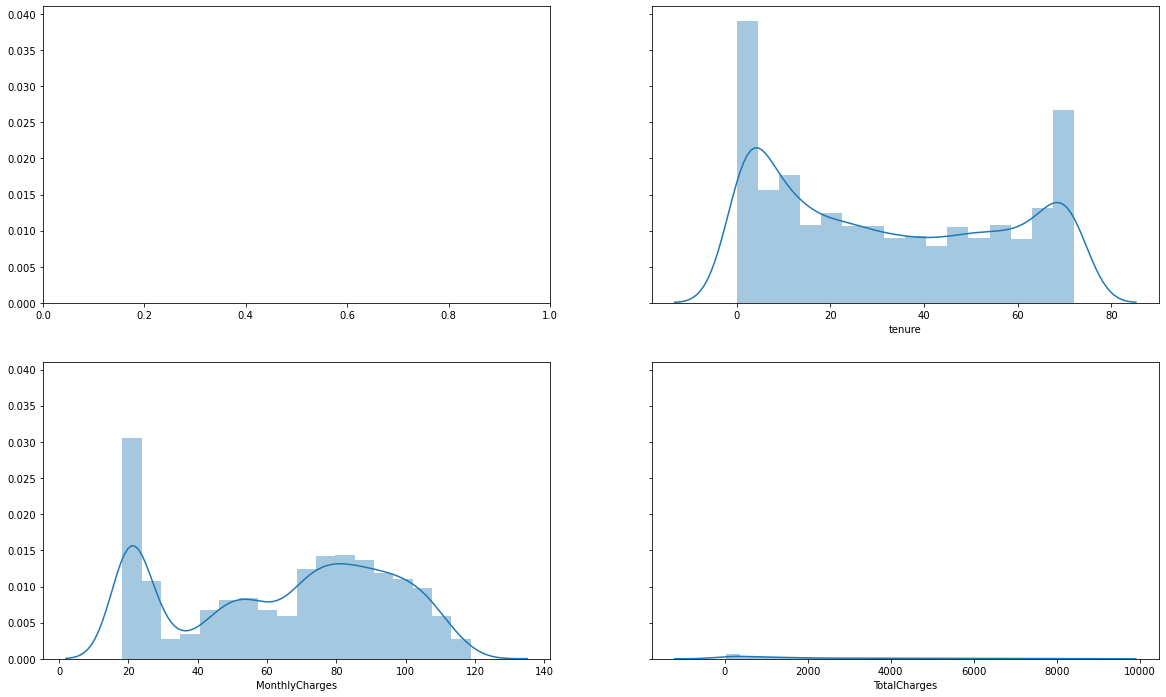

In [38]:
fig,axes=plt.subplots(2,2,figsize=(20,12),sharey=True)

sns.distplot(customer_df['tenure'],ax=axes[0,1])
sns.distplot(customer_df['MonthlyCharges'],ax=axes[1,0])
sns.distplot(customer_df['TotalCharges'],ax=axes[1,1])



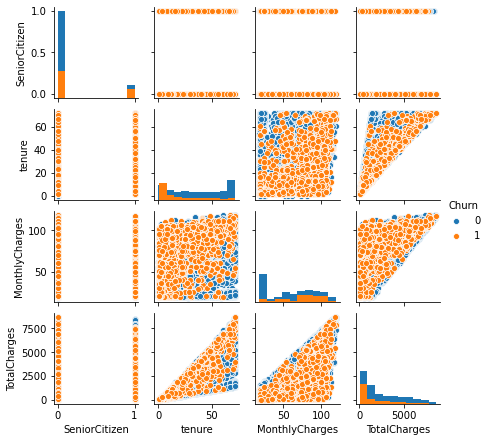

In [39]:
sns.pairplot(data=customer_df,hue='Churn',diag_kind="hist", height=1.5)


From continuous features we will drop customerID and TotalCharges as they do not contribute much to our prediction.

So the final columns which arre nt contributing much to the mode are: 1) gender 2) PhoneService 3) Contract 4) customerID  5) TotalCharges 6) MultipleLines


In [40]:
customer_df.drop(['gender','PhoneService','Contract','TotalCharges','MultipleLines','customerID'],axis=1,inplace=True)

In [41]:
customer_df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


# Data preprocessing 

converting categorical features and binary features to numerical value as then only we can train our model...

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


cat_features = ['SeniorCitizen','Partner','Dependents','InternetService','OnlineSecurity',
                'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                'StreamingMovies','PaperlessBilling','PaymentMethod']
X = pd.get_dummies( customer_df, columns=cat_features, drop_first=True)


In [43]:
sc=MinMaxScaler()
t=sc.fit_transform(customer_df[['tenure']])
month_charge=sc.fit_transform(customer_df[['MonthlyCharges']])


In [44]:
X['tenure']=t
X['MonthlyCharges']=month_charge

In [45]:
customer_df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [46]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Resampling

Text(0.5, 1.0, 'before resampling')

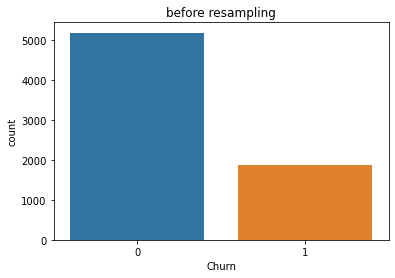

In [47]:
sns.countplot(data=customer_df,x='Churn').set_title("before resampling")

In [48]:
churn1=X[X.Churn==1]
churn0=X[X.Churn==0]

In [49]:
print(len(churn1),len(churn0))

1869 5174


In [50]:
churn1_upsampled = churn1.sample(n=len(churn0), replace=True, random_state=40)
print(len(churn1_upsampled))

5174


In [51]:
ch_upsampled = churn0.append(churn1_upsampled).reset_index(drop=True)
print(len(ch_upsampled))

10348


Text(0.5, 1.0, 'after resampling')

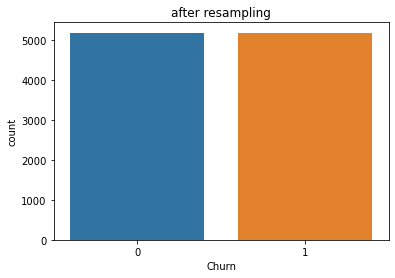

In [52]:
sns.countplot(data=ch_upsampled,x='Churn').set_title("after resampling")

In [53]:
X.shape

(7043, 24)

# Machine Learning Model




now lets make our churn prediction model and see the best accuracy that we will get from the three below models.
Lets compare the models for the best accuracy of the model.

### train test and split

Now it's time to do a train test split, and train our model!


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x = ch_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = ch_upsampled['Churn'] #target (dependent variable)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2,random_state=100)

## Logistic Regression 


First testing the accuracy with linear regression model.

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train,Y_train)

LogisticRegression()

In [58]:
lr_pred=lr.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [60]:
Y_test[:10]

8282     1
9970     1
10070    1
8398     1
7310     1
3269     0
10132    1
7055     1
2429     0
10155    1
Name: Churn, dtype: int64

In [61]:
lr_pred[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [62]:
confusion_matrix(Y_test,lr_pred)

array([[804, 219],
       [247, 800]], dtype=int64)

In [63]:
accuracy_score(Y_test,lr_pred)*100 

77.487922705314

In [64]:
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1023
           1       0.79      0.76      0.77      1047

    accuracy                           0.77      2070
   macro avg       0.78      0.78      0.77      2070
weighted avg       0.78      0.77      0.77      2070



So the accyracy of this model is 75%.
Now lets compare it with other models.

## Decision Trees

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [66]:
dt_pred = dtree.predict(X_test)

In [67]:
Y_test[:10]

8282     1
9970     1
10070    1
8398     1
7310     1
3269     0
10132    1
7055     1
2429     0
10155    1
Name: Churn, dtype: int64

In [68]:
dt_pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [69]:
confusion_matrix(Y_test,dt_pred)

array([[825, 198],
       [ 75, 972]], dtype=int64)

In [70]:
accuracy_score(Y_test,dt_pred)*100 

86.81159420289855

In [71]:
print(classification_report(Y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1023
           1       0.83      0.93      0.88      1047

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



So the accuracy of the model through decision tree is 86.8% which is much better than our linear regression model.

Now lets see the accuracy of our model through Random forest algorithm.

## Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [123]:
rf_pred = rfc.predict(X_test)

In [124]:
Y_test[:10]

8282     1
9970     1
10070    1
8398     1
7310     1
3269     0
10132    1
7055     1
2429     0
10155    1
Name: Churn, dtype: int64

In [125]:
rf_pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [126]:
confusion_matrix(Y_test,rf_pred)

array([[875, 148],
       [ 56, 991]], dtype=int64)

In [127]:
accuracy_score(Y_test,rf_pred)*100 

90.14492753623189

In [128]:
print(classification_report(Y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1023
           1       0.87      0.95      0.91      1047

    accuracy                           0.90      2070
   macro avg       0.90      0.90      0.90      2070
weighted avg       0.90      0.90      0.90      2070



So we get the accuracy of our model as 90.14% which is much better than other algorithm models.

###### Thus finally we can say that we have achieved the accuracy of our Churn prediction model as approx 90%